In [1]:
import pandas as pd
import numpy as np

In [ ]:
# -------------------------------------Task 1: Exploratory Data Analysis (EDA)--------------------------------------------------

In [4]:
df = pd.read_csv("10. Pharma_Industry.csv")
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [6]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [7]:
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

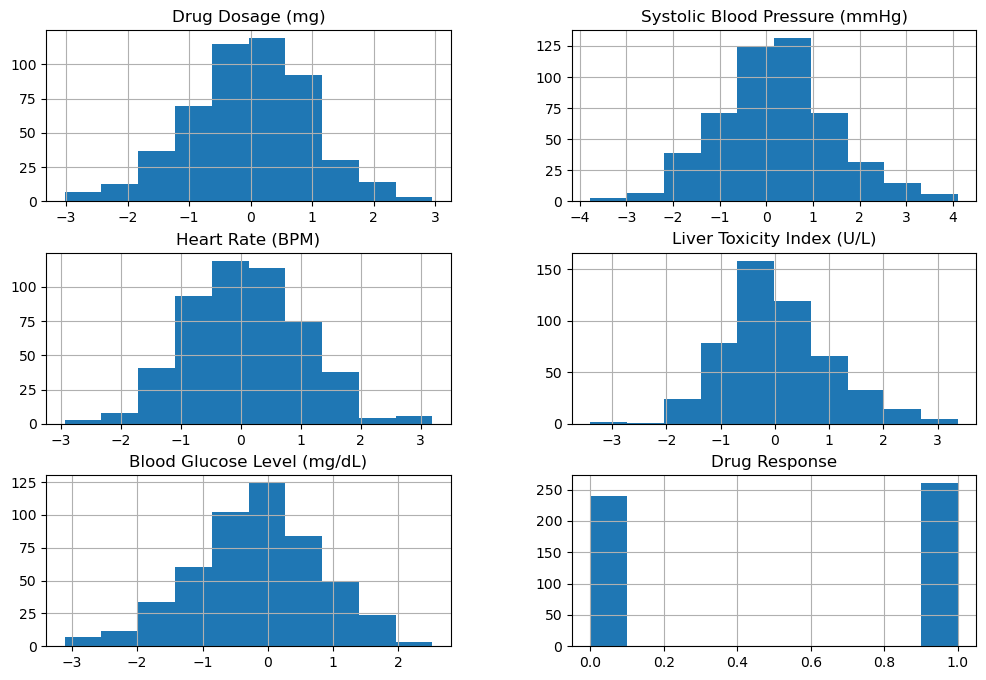

In [8]:
# 2.	Utilize histograms, box plots, or density plots to understand feature distributions.

import matplotlib.pyplot as plt

df.hist(figsize=(12,8))
plt.show()

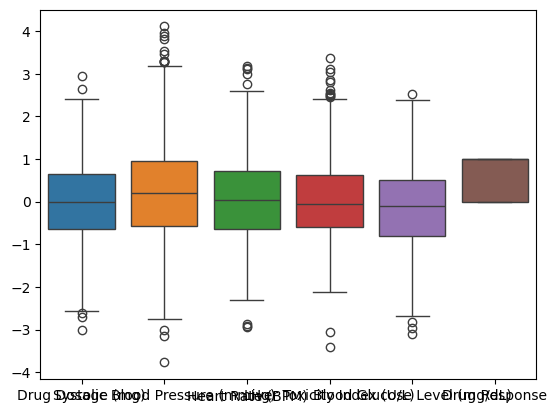

In [9]:
import seaborn as sns

sns.boxplot(data=df.select_dtypes(include=np.number))
plt.show()

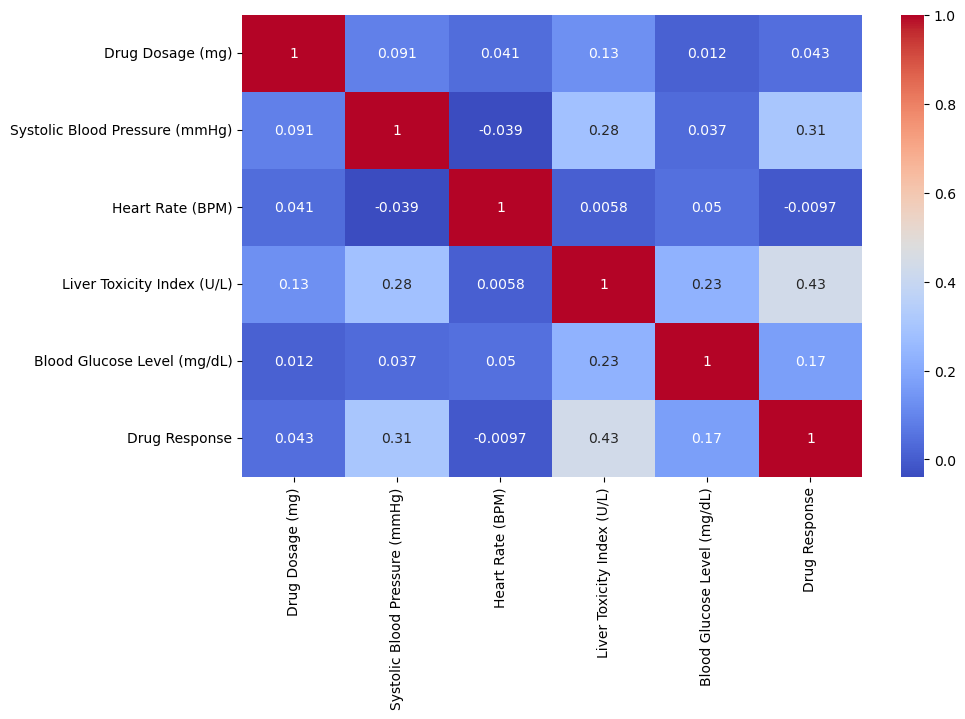

In [10]:
# 3.	Investigate feature correlations to discern relationships within the data.

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# -------------------------------------------Task 2: Data Preprocessing---------------------------------------------------

In [11]:
# 1.	Encode categorical variables if necessary.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [13]:
# 2.	Split the dataset into training and testing sets.

from sklearn.model_selection import train_test_split

X = df.drop('Drug Response', axis=1)   
y = df['Drug Response']                


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# ------------------------------------------Task 3: Data Visualization------------------------------------------------------

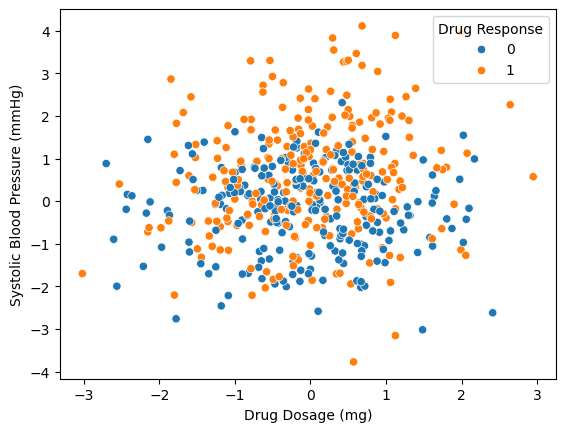

In [14]:
# 1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y)
plt.show()

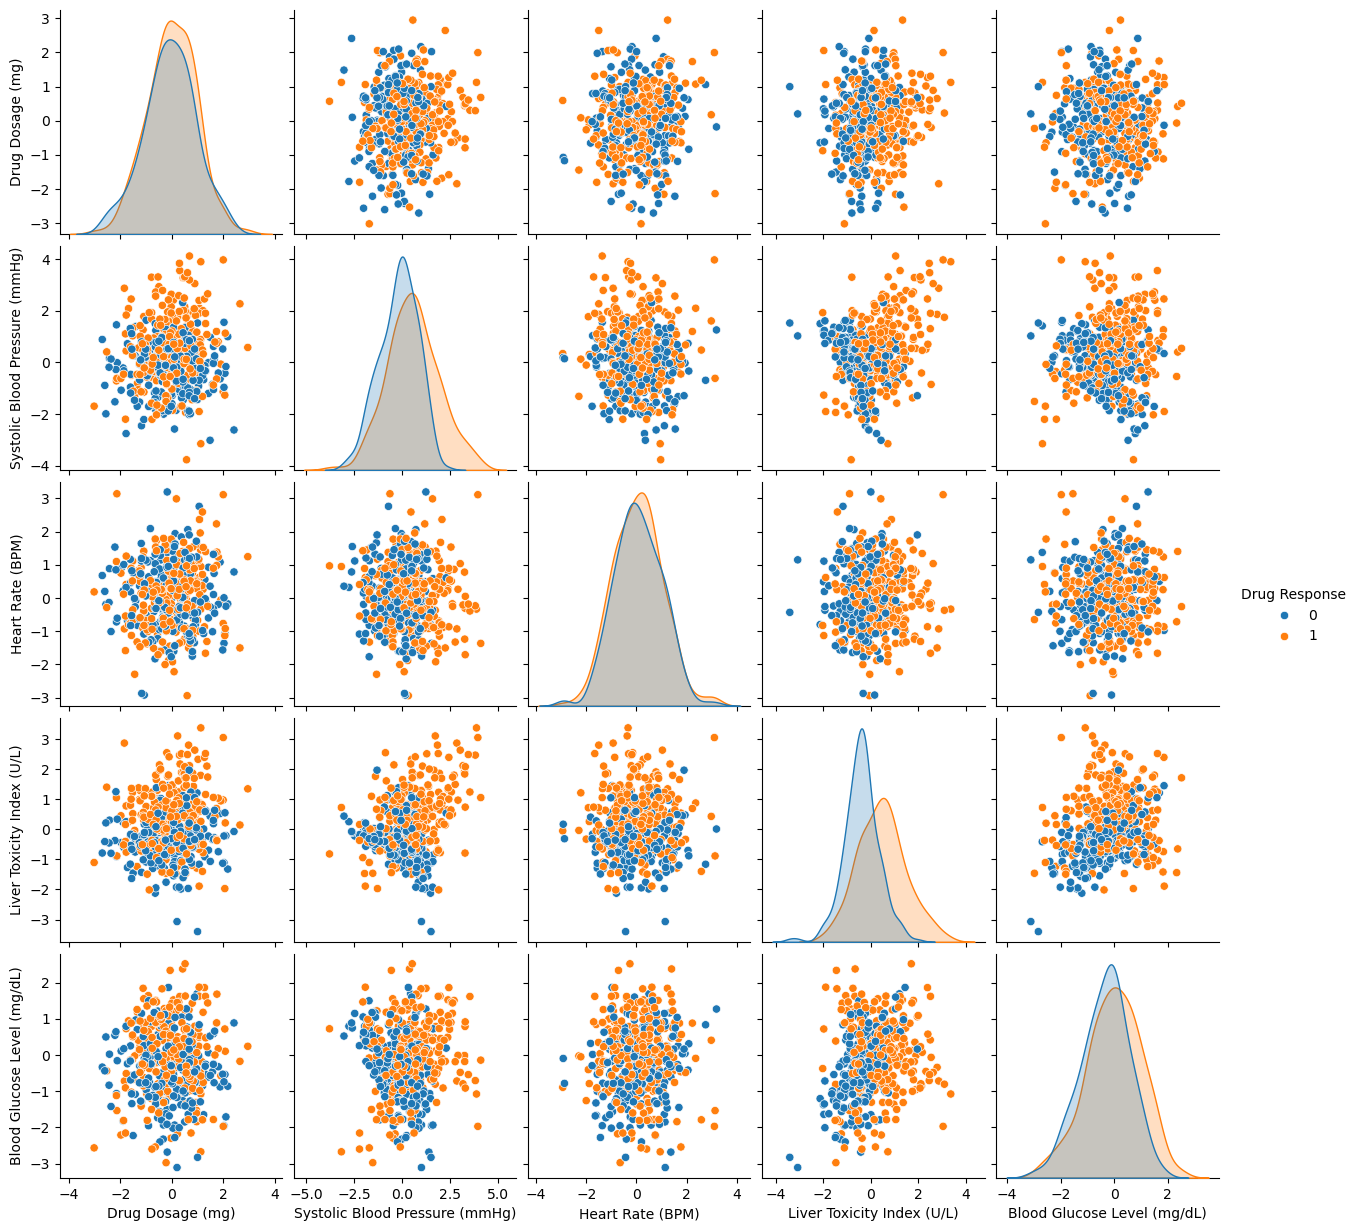

In [16]:
sns.pairplot(df, hue='Drug Response')
plt.show()

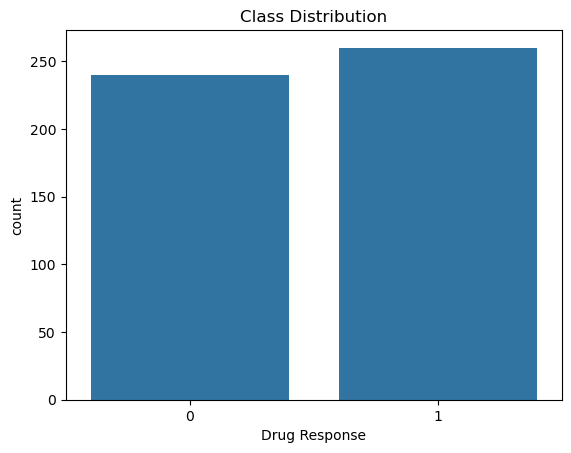

In [17]:
# 2.	Visualize class distributions to gauge dataset balance or imbalance.

sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

In [ ]:
# --------------------------------------------Task 4: SVM Implementation-------------------------------------------------------------

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.84
Precision: 0.8413204508856683
Recall: 0.84
F1-score: 0.8403232323232322


In [ ]:
#---------------------------------------------- Task 5: Visualization of SVM Results---------------------------------------------------

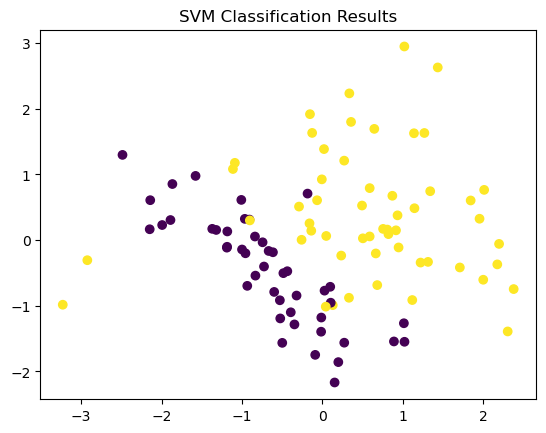

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap='viridis')
plt.title("SVM Classification Results")
plt.show()

In [ ]:
# -----------------------------------Task 6: Parameter Tuning and Optimization--------------------------------------------------------

In [31]:
# 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
                                                  
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [32]:
best_svm = grid.best_estimator_

In [33]:
# -------------------------------------------Task 7: Comparison and Analysis----------------------------------------------------------

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [35]:
kernels = ['linear', 'poly', 'rbf']
results = []

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    results.append({
        'Kernel': kernel,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,Kernel,Accuracy,Precision,Recall,F1-score
0,linear,0.78,0.840000,0.750000,0.792453
1,poly,0.71,0.885714,0.553571,0.681319
2,rbf,0.84,0.870370,0.839286,0.854545


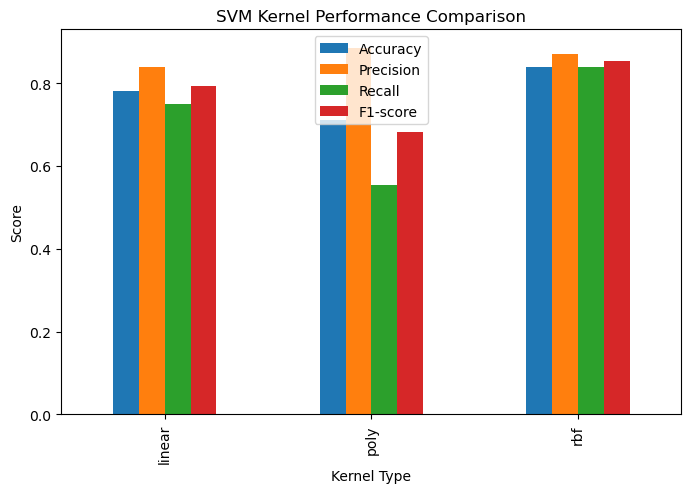

In [36]:
# 2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

import matplotlib.pyplot as plt

results_df.set_index('Kernel').plot(kind='bar', figsize=(8,5))
plt.title("SVM Kernel Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Kernel Type")
plt.show()

In [ ]:
# # 3.	Discuss practical implications of SVM in real-world classification tasks.

# # Strengths:
# # 1.Handles high-dimensional data effectively
# # 2.Performs well with non-linear decision boundaries
# # 3.Robust against overfitting with proper tuning

# # Weaknesses:
# # 1.Sensitive to kernel and hyperparameter selection
# # 2.Computationally expensive for large datasets
# # 3.Less interpretable compared to simpler models

# SVM is suitable for real-world classification tasks such as drug response prediction.
# It is widely used in medical decision support systems and personalized medicine.
# SVM provides high accuracy but requires careful parameter tuning and scaling.